#看下边每一块的说明，运行代码，注意第二块不要运行，因为没有用到。

In [1]:
#用于载入csv文件
#注意把os.chdir 和 file换成自己的路径
import os
import pandas as pd
os.chdir('D:/Summary_Hashtag_files/Summary_Hashtag_Weekly')
file = 'D:/Summary_Hashtag_files/Summary_Hashtag_Weekly/distribution.csv'
csvFile = pd.read_csv(file,encoding='iso-8859-1')
print(csvFile.head(10))
list_Hashtag = csvFile.totalnum.tolist()

                _id  totalnum
0          #covid19   7331744
1      #coronavirus   3178320
2            #covid    828215
3           #corona    342619
4         #lockdown    334620
5  #covid<u+30fc>19    266265
6         #stayhome    250510
7            #china    194295
8        #wearamask    177071
9         #pandemic    164930


In [2]:
#注意这块代码不要运行
#这个是用于分组的，最后决定还是不用分组，原题要求是 draw a plot showing the distribution of the hashtags in terms of number of
#tweets citing the hashtag， 所以横坐标是1，2，3，一直到730多万，（因为引用量最高的一个，引用了730万次）纵坐标是引用量为1，2，3……的hashtag的数量。
import numpy as np
Number = list()
Number.append(np.sum(list(map(lambda x: 1<=x<=2 , list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 3<=x<=4 , list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 5<=x<=6 , list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 7<=x<=8 , list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 9<=x<=10 , list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 10<=x<=15, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 15<=x<=20, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 20<=x<=30, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 30<=x<=40, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 40<=x<=50, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 50<=x<=70, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 70<=x<=90, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 90<=x<=110, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 110<=x<=200, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 200<=x<=300, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 300<=x<=400, list_Hashtag))))
Number.append(np.sum(list(map(lambda x: 400<=x<=500, list_Hashtag))))
Number.append(np.sum(list(map(lambda x:500<=x<=1000, list_Hashtag))))
Number.append(np.sum(list(map(lambda x:1000<=x<=10000, list_Hashtag))))
Number.append(np.sum(list(map(lambda x:10000<=x<=100000, list_Hashtag))))
Number.append(np.sum(list(map(lambda x:100000<=x, list_Hashtag))))
print(Number)

KeyboardInterrupt: 

In [3]:
#运行一会儿，凑够50个就可以暂停，运行按钮旁边的黑方块就是暂停
import numpy as np
Number = list()
for i in range(1,10000):
    print(i)
    num = np.sum(list(map(lambda x: x==i , list_Hashtag)))
    print(num)
    Number.append(num)

1
1129785
2
302963
3
145497
4
90508
5
59660
6
45438
7
32880
8
27292
9
21489
10
18239
11
15144
12
13583
13
11245
14
9817
15
8859
16
8040
17
7314
18
6566
19
5748
20
5405
21
4995
22
4518
23
4167
24
3927
25
3679
26
3328
27
3137
28
3009
29
2817
30
2765
31
2447
32
2430
33
2294
34
2167
35
2082
36
1938
37
1818
38
1802
39
1641
40
1661
41
1499
42
1562
43
1380
44
1370
45
1324
46
1215
47
1213
48
1179
49
1161
50
1284
51
1102
52
1049
53
1009
54
957
55


KeyboardInterrupt: 

In [4]:
from scipy import stats
X1 = np.linspace(1, 50, 50)
Y1 = Number[0:50]
slope, intercept, r_value, p_value, std_err = stats.linregress(X1, Y1)
print("R-squared:%f" % r_value**2)

R-squared:0.143118


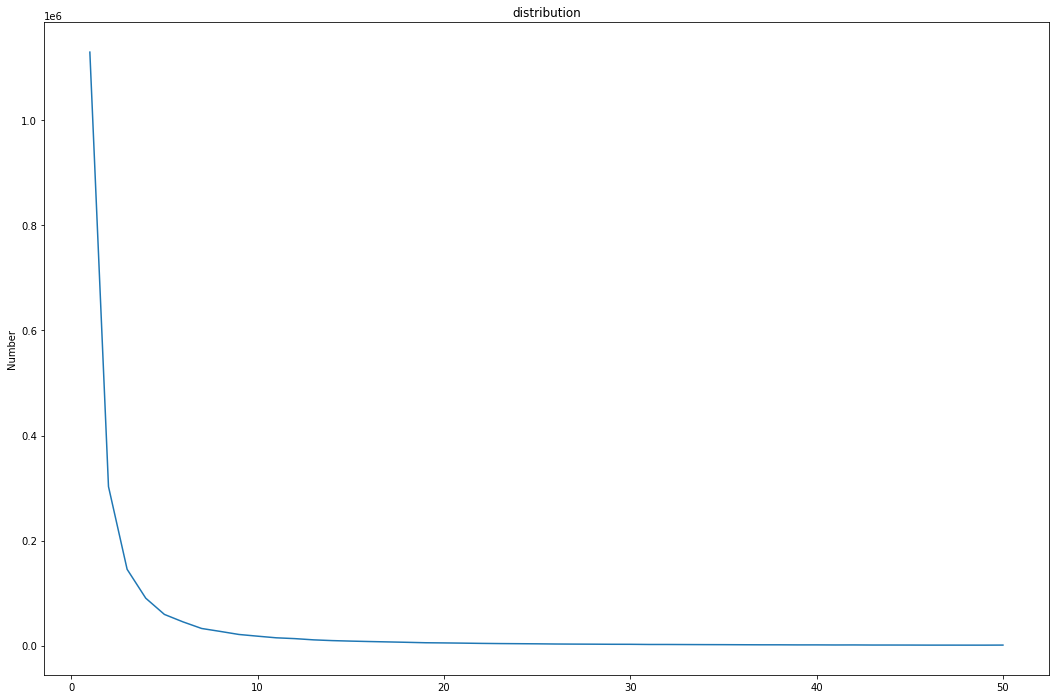

In [4]:
#用于画图
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
X1 = np.linspace(1, 50, 50)
plt.title("distribution")
ax1.set_ylabel('Number')
ax1.plot(X1,Number[0:50])
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\第一问\\distribution.jpg')

<ipython-input-5-77485dcd9f86>:7: RuntimeWarning: overflow encountered in power
  return a*x**b+c


[ 1.12741413e+06 -1.86924349e+00  1.26733467e+03]


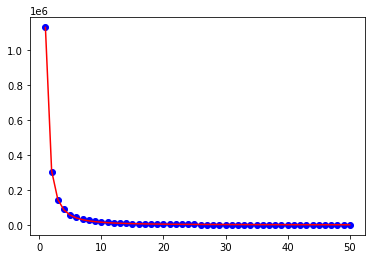

In [5]:
#用于拟合幂函数，能够拟合出一条曲线，所以很符合幂律分布
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a ,b, c):
    return a*x**b+c
plt.plot(X1, Number[0:50], 'bo', label='data')
popt, pcov = curve_fit(func, X1, Number[0:50],maxfev = 200000)
print(popt)
plt.plot(X1, func(X1, *popt), 'r-')
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\第一问\\curve_fit.jpg')

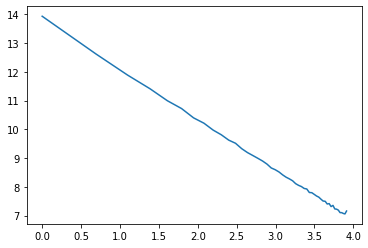

In [6]:
#如果plot(log(x),log(y))是一条直线，那么就符合幂律分布
plt.plot(np.log(X1),np.log(Number[0:50]))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\第一问\\curve_fit_straght_line.jpg')